# 1. El espacio muestral asociado a un experimento aleatorio
---

El espacio muestral $\Omega$ del experimento aleatorio de lanzar dos dados honestos,está compuesto por todas las parejas ordenadas $(i,j)$ tales que $\leq i,j \leq 6$

$$\Omega = \{(i,j) \mid 1 \leq i,j \leq l \}$$
y sabemos que $\#\Omega\ = 6^2 = 36 $

In [ ]:
from itertools import product

In [ ]:
Omega = set(product([1, 2, 3, 4, 5, 6], repeat=2))
print(Omega)

{(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3)}


In [ ]:
card_Omega = len(Omega)
card_Omega

Sea $S_n$ el evento "La suma de los dados en $n$". Esto es:
 $S_n = {(i,j) ∈ \Omega: i + j = n}$

In [ ]:
def S(n):
  Sn = {(i,j) for i in range(1,7) for j in range (1,7) if i+j == n}
  return Sn

In [ ]:
print(S(9))

{(6, 3), (4, 5), (5, 4), (3, 6)}


# 2. La variable aleatoria asociada a $S_n$
---

In [ ]:
from fractions import Fraction

In [ ]:
#Definir la funcion P(A)
#Es la probabilidad del evento A definida mediante la definición clásica

def P(A):
  P = Fraction(len(A), len(Omega))
  return P

In [ ]:
#Definicion de un diccionario
#(i,j) pares ordenados y los valores de su suma

S = {(i,j) : i+j for i,j in Omega}


In [ ]:
# Agrupacion de combinaciones por suma
from collections import defaultdict

dS = defaultdict(set)

In [ ]:
# Vamos a recorrer sobre los elementos en S
for i,j in S.items():
  dS[j].add((i))

In [ ]:
list(dS.items())

[(7, {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)}),
 (4, {(1, 3), (2, 2), (3, 1)}),
 (9, {(3, 6), (4, 5), (5, 4), (6, 3)}),
 (10, {(4, 6), (5, 5), (6, 4)}),
 (6, {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)}),
 (8, {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)}),
 (11, {(5, 6), (6, 5)}),
 (3, {(1, 2), (2, 1)}),
 (5, {(1, 4), (2, 3), (3, 2), (4, 1)}),
 (2, {(1, 1)}),
 (12, {(6, 6)})]

In [ ]:
# LeyS almacenan la probabilidad de caso posible suma,
# Usando la funcion P(A)
# A es el conjunto de pares que producen la suma i
leyS = {i : P(A) for i,A in dS.items()}
leyS

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

In [ ]:
# Importamos la libreria Pandas
import pandas as pd

Recordemos que una variable aleatoria real $X$, es una función.
$$X : \Omega \to \mathbb{R}$$
Sabemos que la función de densidad de una v.a. discreta $X$ se define como sigue:
$$ f_X(x) = \begin{cases} \mathbb{P}(X=x), \quad \text{si } x\in R_{x} \\ 0, \quad \text{e.o.c} \end{cases}$$
donde $R_X$ es el rango de la v.a. X.

Para nuestro evento $S_n$, se tiene la siguiente v.a.:
$$ S : \Omega \to \{2,3,4,5,6,7,8,9,10,11,12\}$$

In [ ]:
# Vamos a crear una serie
ley_S = pd.Series(leyS)
ley_S.sort_index() #Ordena

,0
2,1/36
3,1/18
4,1/12
5,1/9
6,5/36
7,1/6
8,5/36
9,1/9
10,1/12
11,1/18


In [ ]:
import numpy as np

In [ ]:
# leyS(i) devuelve la probabilidad de obtener la suma i, si está en el rango de posibles sumas
def leyS(i):
  if i in range(2,13):
    x = ley_S[i]
    return x
  else:
    x = 0
  return x

In [ ]:
# Vamos a crear el rango de S
# Creo una lista con los posibles valores
rango_S = [k for k in range(2,13)]

# Obtenemos la probabilidad de cada suma
p_k = [float(leyS(k)) for k in rango_S]

In [ ]:
# Creamos un DataFrame
# - los valores del rango_S
# - las probabilidades p_k
# Indexamos una etiqueta S_2,...,S_11
# zip() -> toma dos listas y las combina en pares ordenados
df = pd.DataFrame(list(zip(rango_S, p_k)), index=[f"S_{i}" for i in rango_S], columns=['rango', 'densidad'])
df

,rango,densidad
S_2,2,0.027778
S_3,3,0.055556
S_4,4,0.083333
S_5,5,0.111111
S_6,6,0.138889
S_7,7,0.166667
S_8,8,0.138889
S_9,9,0.111111
S_10,10,0.083333
S_11,11,0.055556


<Axes: xlabel='rango'>

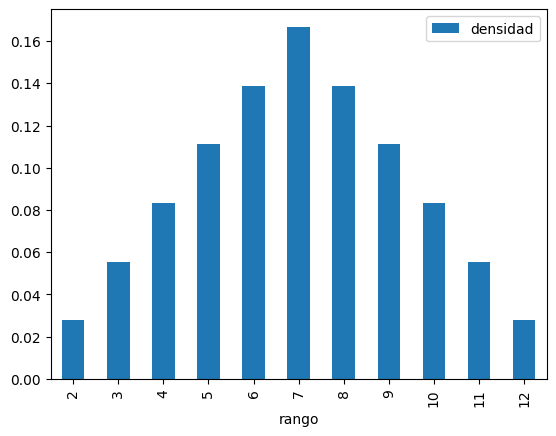

In [ ]:
df.plot.bar(x='rango', y='densidad')

# Probabilidad Frecuentista
---
Tenemos la hipótesis de que el espacio muestral es un conjunto finito, y podemos definir la probabilidad asociada a un evento $A$:

$$ f_n(A) = \frac{n{A}}{n}$$
donde $n(A)$ denota al número de veces que ocurre $A$, y $n$ es el número de veces que se realiza el experimento.

In [ ]:
import random

Se tiene el lanzamiento de monedas **injustas** (volados)

In [ ]:
def volado(p):
  return 'sol' if random.random() < p else 'aguila'

In [ ]:
volado(0.4)

'aguila'

In [ ]:
a = [volado(0.4) for i in range(10)]
a

['aguila',
 'sol',
 'sol',
 'aguila',
 'sol',
 'aguila',
 'sol',
 'aguila',
 'aguila',
 'sol']

In [ ]:
a.count('sol')

5

In [ ]:
resultados = []
for i in range(10):
  resultado = volado(0.4)
  resultados.append(resultado)

resultados

['sol', 'sol', 'aguila', 'sol', 'sol', 'sol', 'sol', 'aguila', 'sol', 'aguila']

In [ ]:
# Vamos a simular nuestra probabilidad frecuentista
probabilidades = [] #lista vacia
for i in range(10000): # Simula 1000 experimentos
  resultados = []
  for j in range(10):
    resultado = volado(0.63)
    resultados.append(resultado)
  probabilidades.append(resultados.count('sol')/10)
promedioSoles = sum(probabilidades)/len(probabilidades)
print("Probabilidad {:.3f}".format(promedioSoles))

Probabilidad 0.630
